# cse-221710305019-siddharth venkat

1.Choose a dataset of your choice from kaggle or UCI, which should contain both categorical and numerical columns. Those who are unable to find they may use https://raw.githubusercontent.com/sumathi16/Datasets/master/Human_Resources_Employee_Attrition.csv Only use the top 200 rows to perform all the operations.
Note: If you have taken another dataset please provide its link in the notebook.

Read the data in the proper format based on the data you have selected.
a.What is the data separator?
b.Is the data contains header?
c.If no, then get the names of the columns from the description and give them using the proper arguments of the function

After getting the data as a dataframe check how many rows and columns are there?

Check how many categorical and numerical columns are there?
a.Categorical - object type
b.Numerical - int,float
c.Boolean - bool

Create a copy of the dataframe. Later on perform the operations on a new dataframe.

Observe the data and check for missing data and duplicates based on entire data.
a.Remove the duplicates
b.Replace the missing values with a function of your choice

Apply standard scaler for all the columns

Apply onehotencoder to a categorical column

Apply labelEncoder to a categorical column

Apply pd.get_dummies for the entire data frame and check how many columns added.

Select one column from your data(which is your output). Store output in y

Except the output column, all the remaining columns are your inputs. Store all inputs in X.

Split the data with a specific random state and make 25% of the data for testing and 75% of the data for training



In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df=pd.read_csv("https://raw.githubusercontent.com/sumathi16/Datasets/master/Human_Resources_Employee_Attrition.csv").head(200)
df

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
195,0.09,0.80,6,304,4,0,1,0,technical,low
196,0.27,0.54,7,278,3,0,1,0,technical,low
197,0.10,0.91,6,287,4,0,1,0,technical,low
198,0.10,0.89,7,285,4,0,1,0,technical,low


In [11]:
print("rows:",df.shape[0],",columns:",df.shape[1])


rows: 200 ,columns: 10


In [12]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
satisfaction_level       200 non-null float64
last_evaluation          200 non-null float64
number_of_projects       200 non-null int64
average_monthly_hours    200 non-null int64
years_at_company         200 non-null int64
work_accident            200 non-null int64
left                     200 non-null int64
promotion_last_5years    200 non-null int64
department               200 non-null object
salary                   200 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 15.8+ KB


In [13]:
print("no. of numerical columns:",len(list(df.select_dtypes(include=['int64','float64']).columns)))
print("no. of categorical columns:",len(list(df.select_dtypes(include=['object']).columns)))

no. of numerical columns: 8
no. of categorical columns: 2


In [14]:
new_df=df.copy() #new dataframe
new_df

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
195,0.09,0.80,6,304,4,0,1,0,technical,low
196,0.27,0.54,7,278,3,0,1,0,technical,low
197,0.10,0.91,6,287,4,0,1,0,technical,low
198,0.10,0.89,7,285,4,0,1,0,technical,low


In [15]:
new_df.isna().sum() #There are no nan values


satisfaction_level       0
last_evaluation          0
number_of_projects       0
average_monthly_hours    0
years_at_company         0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [16]:
for i in new_df.columns:
    print(new_df[i].value_counts(),"\n\n")

0.11    24
0.10    17
0.40    15
0.09    14
0.45    14
0.38    12
0.37    11
0.43     8
0.41     7
0.84     7
0.90     6
0.39     5
0.44     5
0.36     5
0.89     5
0.42     4
0.74     3
0.46     3
0.76     3
0.81     2
0.70     2
0.92     2
0.79     2
0.85     2
0.31     2
0.78     1
0.72     1
0.83     1
0.91     1
0.14     1
0.82     1
0.32     1
0.86     1
0.73     1
0.54     1
0.13     1
0.87     1
0.80     1
0.71     1
0.17     1
0.24     1
0.77     1
0.57     1
0.27     1
0.75     1
Name: satisfaction_level, dtype: int64 


0.46    12
0.50    11
0.54    11
0.55    10
1.00    10
0.87     9
0.84     8
0.51     7
0.52     7
0.89     6
0.92     6
0.99     6
0.48     6
0.57     6
0.80     6
0.49     6
0.53     5
0.47     5
0.56     5
0.94     5
0.85     5
0.88     4
0.83     4
0.91     4
0.95     4
0.77     4
0.45     3
0.74     2
0.86     2
0.98     2
0.78     2
0.97     2
0.62     2
0.81     2
0.82     2
0.96     2
0.79     2
0.70     2
0.68     1
0.59     1
0.93     1
Name: last_e

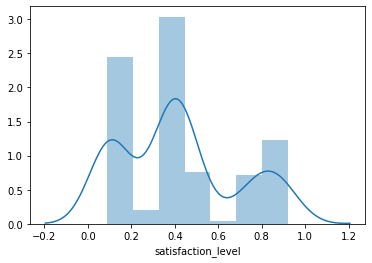

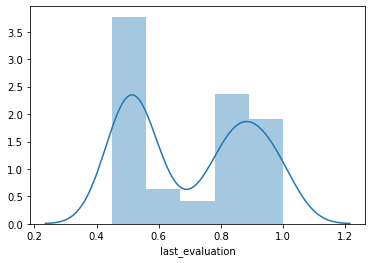

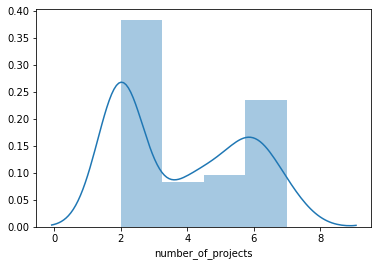

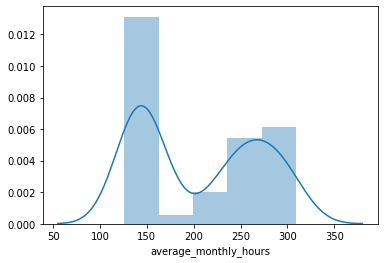

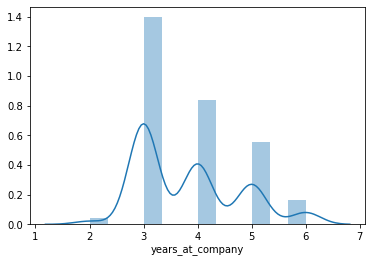

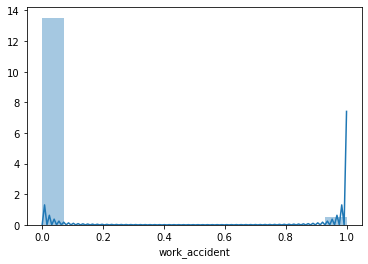

C:\Users\Kiran Kumar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Kiran Kumar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


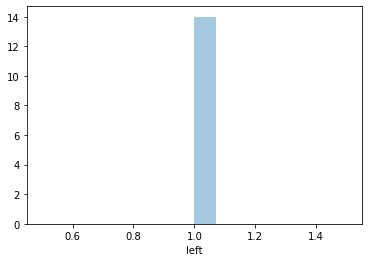

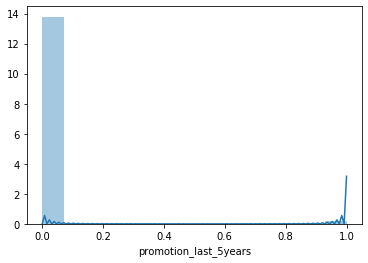

In [17]:
for i in new_df.select_dtypes(include=['int64','float64']).columns:
    sns.distplot(new_df[i])
    plt.xlabel=i
    plt.show() 

Above is the distplot for all numerical columns
And in this there are no 0's and no duplicate data
Range of Satisfaction_level is 0.1 to 0.9
Range of last_evaluation is 0.4 to 1.0
Range of no_of_projects is 2 to 7
Range of Average_monthly_hours is 100 to 350
Range of years_at_company is 2,3,4,5,6 (discontinues plot)
work_accidents has lot of '0' i.e.NO and less '1'
left has no '1' only '0' i.e,NOt left
promotions_last_5years has lot of '0' i.e.,NO and less '1'

department


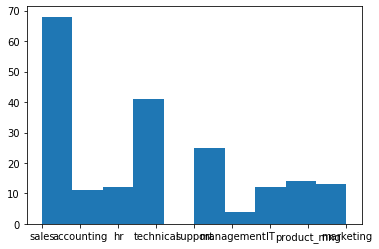

salary


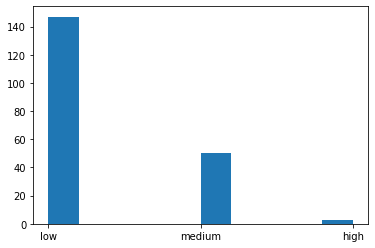

In [18]:
for i in new_df.select_dtypes(include=['object']).columns:
    plt.hist(new_df[i])
    plt.title=i
    print(i)
    plt.show() 

Above hist plot of categorical columns
In Department column has largest frequency is 'sales' category and least frequency is 'magement' category
In salary largest frequency is 'low' category and least frequency is 'high'

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

c_t=ColumnTransformer(transformers=[('Encoder',OneHotEncoder(),['department'])],remainder="passthrough")

data=c_t.fit_transform(new_df)
data=pd.DataFrame(data)
data=data.iloc[:,0:9]
data.columns=['dep_sales','dep_technical','dep_support','dep_product_mng','dep_marketing','dep_IT','dep_hr',
              'dep_accounting','dep_management']
new_df
=pd.concat([new_df,data],axis=1)
new_df=new_df.drop('department',axis=1)
new_df


,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,salary,dep_sales,dep_technical,dep_support,dep_product_mng,dep_marketing,dep_IT,dep_hr,dep_accounting,dep_management
0,0.38,0.53,2,157,3,0,1,0,low,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,medium,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,medium,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,low,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,low,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.09,0.80,6,304,4,0,1,0,low,0,0,0,0,0,0,0,0,1
196,0.27,0.54,7,278,3,0,1,0,low,0,0,0,0,0,0,0,0,1
197,0.10,0.91,6,287,4,0,1,0,low,0,0,0,0,0,0,0,0,1
198,0.10,0.89,7,285,4,0,1,0,low,0,0,0,0,0,0,0,0,1


In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
new_df.salary=le.fit_transform(new_df.salary)
new_df

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,salary,dep_sales,dep_technical,dep_support,dep_product_mng,dep_marketing,dep_IT,dep_hr,dep_accounting,dep_management
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.09,0.80,6,304,4,0,1,0,1,0,0,0,0,0,0,0,0,1
196,0.27,0.54,7,278,3,0,1,0,1,0,0,0,0,0,0,0,0,1
197,0.10,0.91,6,287,4,0,1,0,1,0,0,0,0,0,0,0,0,1
198,0.10,0.89,7,285,4,0,1,0,1,0,0,0,0,0,0,0,0,1


In [21]:
col=new_df.columns
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
sam=pd.DataFrame(ss.fit_transform(new_df))
sam.columns=col
sam

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,salary,dep_sales,dep_technical,dep_support,dep_product_mng,dep_marketing,dep_IT,dep_hr,dep_accounting,dep_management
0,-0.129186,-0.895052,-0.983611,-0.756906,-0.847998,-0.190445,0.0,-0.123404,-0.513087,-0.252646,-0.241249,-0.252646,-0.142857,-0.263664,-0.274352,1.393261,-0.377964,-0.507801
1,1.473708,0.803436,0.611434,0.877208,2.331995,-0.190445,0.0,-0.123404,1.670262,-0.252646,-0.241249,-0.252646,-0.142857,-0.263664,-0.274352,1.393261,-0.377964,-0.507801
2,-1.159617,0.906375,1.674798,1.032838,0.212000,-0.190445,0.0,-0.123404,1.670262,-0.252646,-0.241249,-0.252646,-0.142857,-0.263664,-0.274352,1.393261,-0.377964,-0.507801
3,1.168395,0.854906,0.611434,0.270251,1.271997,-0.190445,0.0,-0.123404,-0.513087,-0.252646,-0.241249,-0.252646,-0.142857,-0.263664,-0.274352,1.393261,-0.377964,-0.507801
4,-0.167350,-0.946521,-0.983611,-0.725780,-0.847998,-0.190445,0.0,-0.123404,-0.513087,-0.252646,-0.241249,-0.252646,-0.142857,-0.263664,-0.274352,1.393261,-0.377964,-0.507801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1.235946,0.494620,1.143116,1.530854,0.212000,-0.190445,0.0,-0.123404,-0.513087,-0.252646,-0.241249,-0.252646,-0.142857,-0.263664,-0.274352,-0.717741,-0.377964,1.969276
196,-0.548991,-0.843582,1.674798,1.126216,-0.847998,-0.190445,0.0,-0.123404,-0.513087,-0.252646,-0.241249,-0.252646,-0.142857,-0.263664,-0.274352,-0.717741,-0.377964,1.969276
197,-1.197781,1.060783,1.143116,1.266283,0.212000,-0.190445,0.0,-0.123404,-0.513087,-0.252646,-0.241249,-0.252646,-0.142857,-0.263664,-0.274352,-0.717741,-0.377964,1.969276
198,-1.197781,0.957844,1.674798,1.235157,0.212000,-0.190445,0.0,-0.123404,-0.513087,-0.252646,-0.241249,-0.252646,-0.142857,-0.263664,-0.274352,-0.717741,-0.377964,1.969276


In [22]:
y=sam['salary']
y

0     -0.513087
1      1.670262
2      1.670262
3     -0.513087
4     -0.513087
         ...   
195   -0.513087
196   -0.513087
197   -0.513087
198   -0.513087
199   -0.513087
Name: salary, Length: 200, dtype: float64

In [23]:
x=sam.drop('salary',axis=1)
x

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,dep_sales,dep_technical,dep_support,dep_product_mng,dep_marketing,dep_IT,dep_hr,dep_accounting,dep_management
0,-0.129186,-0.895052,-0.983611,-0.756906,-0.847998,-0.190445,0.0,-0.123404,-0.252646,-0.241249,-0.252646,-0.142857,-0.263664,-0.274352,1.393261,-0.377964,-0.507801
1,1.473708,0.803436,0.611434,0.877208,2.331995,-0.190445,0.0,-0.123404,-0.252646,-0.241249,-0.252646,-0.142857,-0.263664,-0.274352,1.393261,-0.377964,-0.507801
2,-1.159617,0.906375,1.674798,1.032838,0.212000,-0.190445,0.0,-0.123404,-0.252646,-0.241249,-0.252646,-0.142857,-0.263664,-0.274352,1.393261,-0.377964,-0.507801
3,1.168395,0.854906,0.611434,0.270251,1.271997,-0.190445,0.0,-0.123404,-0.252646,-0.241249,-0.252646,-0.142857,-0.263664,-0.274352,1.393261,-0.377964,-0.507801
4,-0.167350,-0.946521,-0.983611,-0.725780,-0.847998,-0.190445,0.0,-0.123404,-0.252646,-0.241249,-0.252646,-0.142857,-0.263664,-0.274352,1.393261,-0.377964,-0.507801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1.235946,0.494620,1.143116,1.530854,0.212000,-0.190445,0.0,-0.123404,-0.252646,-0.241249,-0.252646,-0.142857,-0.263664,-0.274352,-0.717741,-0.377964,1.969276
196,-0.548991,-0.843582,1.674798,1.126216,-0.847998,-0.190445,0.0,-0.123404,-0.252646,-0.241249,-0.252646,-0.142857,-0.263664,-0.274352,-0.717741,-0.377964,1.969276
197,-1.197781,1.060783,1.143116,1.266283,0.212000,-0.190445,0.0,-0.123404,-0.252646,-0.241249,-0.252646,-0.142857,-0.263664,-0.274352,-0.717741,-0.377964,1.969276
198,-1.197781,0.957844,1.674798,1.235157,0.212000,-0.190445,0.0,-0.123404,-0.252646,-0.241249,-0.252646,-0.142857,-0.263664,-0.274352,-0.717741,-0.377964,1.969276


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2)

In [25]:
x_train

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,dep_sales,dep_technical,dep_support,dep_product_mng,dep_marketing,dep_IT,dep_hr,dep_accounting,dep_management
159,0.137963,-1.306806,-0.983611,-1.145981,-0.847998,-0.190445,0.0,-0.123404,-0.252646,-0.241249,-0.252646,-0.142857,3.792706,-0.274352,-0.717741,-0.377964,-0.507801
100,-0.129186,-0.946521,-0.983611,-0.803595,-0.847998,-0.190445,0.0,-0.123404,-0.252646,-0.241249,-0.252646,-0.142857,-0.263664,-0.274352,1.393261,-0.377964,-0.507801
11,-1.159617,0.546090,1.143116,1.546417,0.212000,-0.190445,0.0,-0.123404,-0.252646,-0.241249,-0.252646,-0.142857,-0.263664,-0.274352,1.393261,-0.377964,-0.507801
187,-0.052857,-1.255337,-0.983611,-0.974788,-0.847998,-0.190445,0.0,-0.123404,-0.252646,-0.241249,3.958114,-0.142857,-0.263664,-0.274352,-0.717741,-0.377964,-0.507801
24,-0.052857,-0.895052,-0.983611,-0.741343,-0.847998,-0.190445,0.0,-0.123404,-0.252646,-0.241249,-0.252646,-0.142857,-0.263664,-0.274352,1.393261,-0.377964,-0.507801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,-1.197781,0.494620,1.674798,1.172905,0.212000,-0.190445,0.0,-0.123404,-0.252646,-0.241249,-0.252646,-0.142857,-0.263664,-0.274352,-0.717741,-0.377964,1.969276
22,-1.235946,1.266660,1.143116,1.530854,0.212000,-0.190445,0.0,-0.123404,-0.252646,-0.241249,-0.252646,-0.142857,-0.263664,-0.274352,1.393261,-0.377964,-0.507801
72,0.137963,-1.100929,-0.983611,-0.881410,-0.847998,-0.190445,0.0,-0.123404,-0.252646,-0.241249,-0.252646,-0.142857,-0.263664,3.644957,-0.717741,-0.377964,-0.507801
15,-0.129186,-0.843582,-0.983611,-0.974788,-0.847998,-0.190445,0.0,-0.123404,-0.252646,-0.241249,-0.252646,-0.142857,-0.263664,-0.274352,1.393261,-0.377964,-0.507801


In [26]:
y_train


159   -0.513087
100    1.670262
11    -0.513087
187    1.670262
24    -0.513087
         ...   
43    -0.513087
22    -0.513087
72    -2.696436
15    -0.513087
168   -0.513087
Name: salary, Length: 150, dtype: float64

In [27]:
x_test


,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,dep_sales,dep_technical,dep_support,dep_product_mng,dep_marketing,dep_IT,dep_hr,dep_accounting,dep_management
112,0.061635,-0.946521,-0.983611,-0.710217,-0.847998,-0.190445,0.0,-0.123404,-0.252646,-0.241249,-0.252646,-0.142857,-0.263664,-0.274352,-0.717741,-0.377964,1.969276
29,-0.129186,-1.049460,-0.983611,-1.145981,-0.847998,-0.190445,0.0,-0.123404,-0.252646,4.145096,-0.252646,-0.142857,-0.263664,-0.274352,-0.717741,-0.377964,-0.507801
182,1.817185,1.472537,0.611434,0.799393,1.271997,-0.190445,0.0,-0.123404,-0.252646,4.145096,-0.252646,-0.142857,-0.263664,-0.274352,-0.717741,-0.377964,-0.507801
199,1.359216,1.215191,0.611434,0.316940,2.331995,-0.190445,0.0,-0.123404,-0.252646,-0.241249,-0.252646,-0.142857,-0.263664,-0.274352,-0.717741,2.645751,-0.507801
193,-1.235946,0.597559,1.143116,0.674889,0.212000,-0.190445,0.0,-0.123404,-0.252646,-0.241249,-0.252646,-0.142857,-0.263664,-0.274352,-0.717741,-0.377964,1.969276
85,-1.159617,0.854906,1.143116,1.546417,0.212000,-0.190445,0.0,-0.123404,-0.252646,-0.241249,-0.252646,-0.142857,3.792706,-0.274352,-0.717741,-0.377964,-0.507801
10,0.137963,-0.843582,-0.983611,-1.099292,-0.847998,-0.190445,0.0,-0.123404,-0.252646,-0.241249,-0.252646,-0.142857,-0.263664,-0.274352,1.393261,-0.377964,-0.507801
54,-1.197781,1.112252,1.674798,1.577543,0.212000,-0.190445,0.0,-0.123404,-0.252646,-0.241249,-0.252646,-0.142857,-0.263664,-0.274352,-0.717741,2.645751,-0.507801
115,-0.167350,-1.152398,-0.983611,-1.068166,-0.847998,-0.190445,0.0,-0.123404,-0.252646,-0.241249,-0.252646,-0.142857,-0.263664,-0.274352,-0.717741,-0.377964,1.969276
35,-1.197781,1.215191,1.143116,0.768267,0.212000,-0.190445,0.0,-0.123404,-0.252646,-0.241249,-0.252646,-0.142857,-0.263664,-0.274352,-0.717741,-0.377964,1.969276


In [28]:
y_test

112   -0.513087
29    -0.513087
182    1.670262
199   -0.513087
193    1.670262
85    -0.513087
10    -0.513087
54    -0.513087
115    1.670262
35    -0.513087
12    -0.513087
92    -0.513087
13    -0.513087
126   -0.513087
174   -0.513087
2      1.670262
44    -0.513087
3     -0.513087
113    1.670262
14    -0.513087
23    -0.513087
25    -0.513087
6     -0.513087
134   -0.513087
165   -0.513087
173   -0.513087
45    -0.513087
65     1.670262
48    -0.513087
122   -0.513087
178    1.670262
64     1.670262
9     -0.513087
57    -0.513087
78    -0.513087
71     1.670262
128   -0.513087
176   -0.513087
131   -0.513087
53    -0.513087
137   -0.513087
163   -0.513087
111   -2.696436
123   -0.513087
109    1.670262
141   -0.513087
41    -0.513087
130   -0.513087
140   -0.513087
5     -0.513087
Name: salary, dtype: float64

In [29]:
# In 200 75% is 150 and 25% is 50
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

x_train: (150, 17)
x_test: (50, 17)
y_train: (150,)
y_test: (50,)
